**Sales Data Analytics**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#Load Dataset
df = pd.read_csv("sales_data.csv")

Explore Data

In [4]:
df.shape

(100, 7)

In [5]:
df.columns

Index(['Date', 'Product', 'Quantity', 'Price', 'Customer_ID', 'Region',
       'Total_Sales'],
      dtype='object')

In [6]:
df.dtypes

Date           object
Product        object
Quantity        int64
Price           int64
Customer_ID    object
Region         object
Total_Sales     int64
dtype: object

In [7]:
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [8]:
df["Date"] = pd.to_datetime(df["Date"])

In [9]:
df["Date"]

0    2024-01-01
1    2024-01-02
2    2024-01-03
3    2024-01-04
4    2024-01-05
        ...    
95   2024-04-05
96   2024-04-06
97   2024-04-07
98   2024-04-08
99   2024-04-09
Name: Date, Length: 100, dtype: datetime64[ns]

Clean Data

In [10]:
#Missing Values
df.isnull().sum()

Date           0
Product        0
Quantity       0
Price          0
Customer_ID    0
Region         0
Total_Sales    0
dtype: int64

In [11]:
#Filling Missing Quantity with zero
df["Quantity"] = df["Quantity"].fillna(0)

In [12]:
df["Quantity"]

0     7
1     4
2     2
3     1
4     8
     ..
95    8
96    1
97    5
98    1
99    5
Name: Quantity, Length: 100, dtype: int64

In [13]:
#Filling Missing Price with mean price
df["Price"] = df["Price"].fillna(df["Price"].mean())

In [14]:
df["Price"]

0     37300
1     15406
2     21746
3     30895
4     39835
      ...  
95    20770
96     7647
97    27196
98    30717
99    23376
Name: Price, Length: 100, dtype: int64

In [15]:
#Dropping Duplicates
df.drop_duplicates(inplace=True)

Sales Analysis

In [16]:
# If no cost column exists, lets assume cost is 80% of price
df["Cost"] = df["Price"] * 0.8


In [17]:
# Create Revenue column
df["Revenue"] = df["Quantity"] * df["Price"]

In [18]:
df["Revenue"]

0     261100
1      61624
2      43492
3      30895
4     318680
       ...  
95    166160
96      7647
97    135980
98     30717
99    116880
Name: Revenue, Length: 100, dtype: int64

In [27]:
#Total Cost
df["Total_Cost"] = df["Quantity"] * df["Cost"]


In [28]:
df["Total_Cost"]

0     208880.0
1      49299.2
2      34793.6
3      24716.0
4     254944.0
        ...   
95    132928.0
96      6117.6
97    108784.0
98     24573.6
99     93504.0
Name: Total_Cost, Length: 100, dtype: float64

In [29]:
#Profit Calculation
df["Profit"] = df["Revenue"] - df["Total_Cost"]

In [19]:
#Total Sales Revenue
total_sales = df["Revenue"].sum()


In [20]:
total_sales

12365048

In [21]:
#Total Quantity Sold
total_quantity = df["Quantity"].sum()

In [22]:
total_quantity

478

In [30]:
#Total Profit
total_profit = df["Profit"].sum()

In [31]:
total_profit

2473009.5999999996

In [33]:
profit_margin = (total_profit / total_sales) * 100

In [34]:
profit_margin

20.0

In [35]:
# Monthly Trend
df["Month"] = df["Date"].dt.to_period("M")
monthly_sales = df.groupby("Month")["Revenue"].sum()

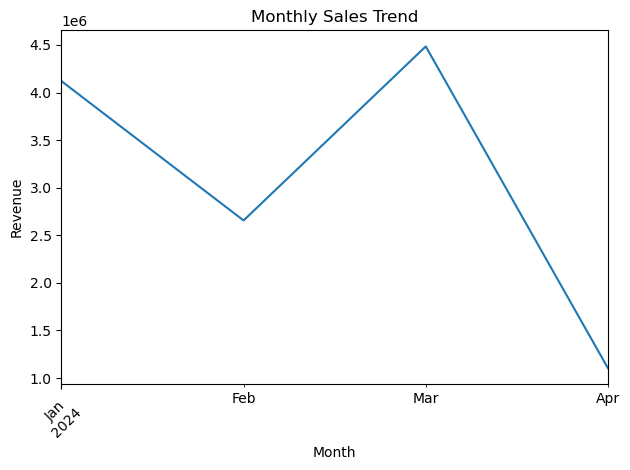

In [39]:
# Monthly Sales Trend
plt.figure()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [36]:
# Top 3 Products
top3_products = (
    df.groupby("Product")["Revenue"]
    .sum()
    .sort_values(ascending=False)
    .head(3)
)

In [37]:
top3_products

Product
Laptop    3889210
Tablet    2884340
Phone     2859394
Name: Revenue, dtype: int64

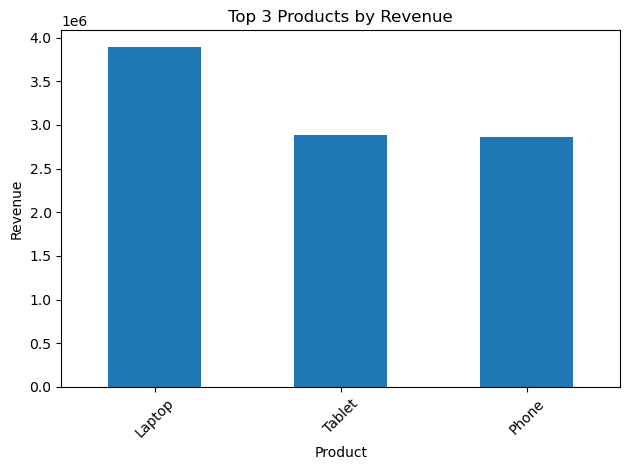

In [40]:
# Top 3 Products Bar Chart
plt.figure()
top3_products.plot(kind="bar")
plt.title("Top 3 Products by Revenue")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
#Best Selling Product (by quantity)
best_product = df.groupby("Product")["Quantity"].sum().idxmax()

In [24]:
best_product

'Laptop'

In [25]:
#Highest Revenue Product
highest_revenue_product = df.groupby("Product")["Revenue"].sum().idxmax()

In [26]:
highest_revenue_product

'Laptop'